# Regression

## 1) Synthetic dataset

We import NumPy and helper utilities from ANFIS-Toolbox, then generate a simple noisy sine dataset for regression:
- Inputs `X` are evenly spaced in [-π, π].
- Targets `y` follow `sin(x)` with Gaussian noise.
This small problem is ideal to showcase ANFIS function approximation.

In [2]:
import numpy as np

np.random.seed(42)  # For reproducibility

n = 200
X = np.linspace(-np.pi, np.pi, n).reshape(-1, 1)
y = np.sin(X[:, 0]) + 0.2 * np.random.randn(n)
y = y.reshape(-1, 1)

## 2) Build, train, and evaluate ANFIS
Instantiate `ANFISRegressor` with Gaussian membership functions and the hybrid trainer:
- membership functions are inferred directly from the data;
- `.fit` tunes both antecedent and consequent parameters;
- we call `.evaluate` on the fitted low-level model for a compact metric report.

In [7]:
from anfis_toolbox import ANFISRegressor

model = ANFISRegressor()
model.fit(X, y)
results = model.evaluate(X, y)

ANFISRegressor evaluation:
  mse: 0.033236
  rmse: 0.182308
  mae: 0.145525
  median_absolute_error: 0.115488
  mean_bias_error: -0.000188
  max_error: 0.542722
  std_error: 0.182308
  explained_variance: 0.940229
  r2: 0.940229
  mape: 61.740511
  smape: 37.811554
  pearson: 0.969654


## 3) Visualize regression predictions
Compare the noisy samples against the ANFIS regression curve to gauge fit quality.

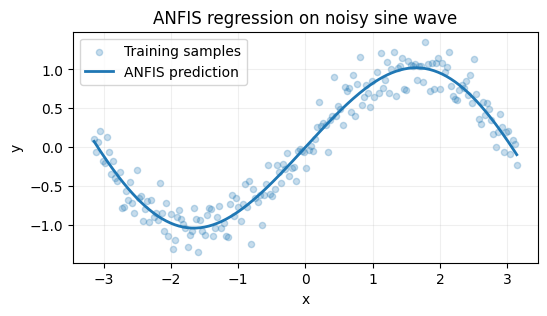

In [6]:
import matplotlib.pyplot as plt

x_flat = X[:, 0]
y_true = y[:, 0]
y_pred = model.predict(X)

plt.figure(figsize=(6, 3))
plt.scatter(x_flat, y_true, s=20, alpha=0.25, label="Training samples")
plt.plot(x_flat, y_pred, linewidth=2, label="ANFIS prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("ANFIS regression on noisy sine wave")
plt.grid(alpha=0.2)
plt.legend()
plt.show()